## Dead time analysis



In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from datetime import date, time
import datetime

## Zynq files

In [222]:
filename = 'test_data/session8.hvps.log.txt'
search_str = "NEW_FILE"

# Grab NEW_FILE logs
lines = [line.rstrip('\n') for line in open(filename) if (search_str in line)]

In [224]:
month = 12 # session 8
#month = 1 # session 9

day = []
timestamp = []
for l in lines:
    start = l.find(search_str)
    d = l[start-21:start-10]
    day.append(date(int(d[7:11]), month, int(d[0:2])))
    ts = l[start-9:start-1]
    timestamp.append(time(hour=int(ts[0:2]), minute=int(ts[3:5]), 
                          second=int(ts[6:8])))
# Combine day and timestamp
zynq_dt = [ datetime.datetime.combine(d, t) for d, t in zip(day, timestamp) ]

In [225]:
dt = np.array(zynq_dt[1:]) - np.array(zynq_dt[:-1])
dt = np.array([_.seconds for _ in dt])

In [258]:
plt.style.use('minimalist')

Text(0.5, 0, 'File number in list')

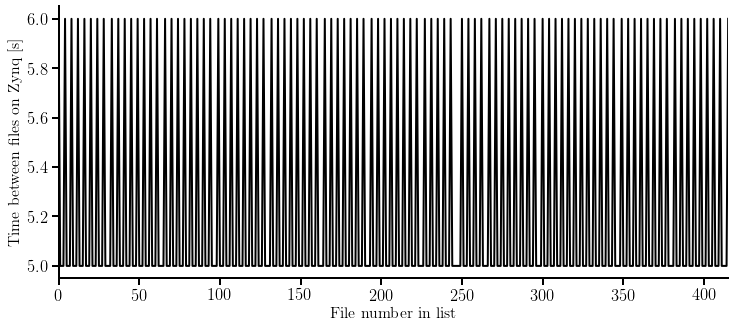

In [260]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.plot(dt[dt<500], '-')
ax.set_ylabel('Time between files on Zynq [s]', fontsize=16)
ax.set_xlabel('File number in list', fontsize=16)

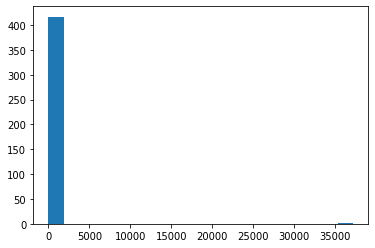

In [227]:
fig, ax = plt.subplots()
ax.hist(dt, bins=20);

## CPU files

In [2]:
filename = 'test_data/CPU_MAIN__2020_02_21__18_29_19.log'
search_str = "with name frm_cc"

lines = [line.rstrip('\n') for line in open(filename) if (search_str in line) and len(line)<100]

In [3]:
day = []
timestamp = []
for l in lines:
    print(l)
    start = l.find(search_str)
    d = l[start-50:start-40]
    ts = l[start-39:start-24]
    day.append(date(int(d[0:4]), int(d[5:7]), int(d[8:10])))
    timestamp.append(time(hour=int(ts[0:2]), minute=int(ts[3:5]), 
                          second=int(ts[6:8]), microsecond=int(ts[9:15])))
cpu_dt = [ datetime.datetime.combine(d, t) for d, t in zip(day, timestamp) ]

2020/02/21 18:30:46.494756 info: new file created with name frm_cc_00000000.dat
2020/02/21 18:30:57.623881 info: new file created with name frm_cc_00000001.dat
2020/02/21 18:31:08.713522 info: new file created with name frm_cc_00000002.dat
2020/02/21 18:31:19.356942 info: new file created with name frm_cc_00000003.dat
2020/02/21 18:31:29.008095 info: new file created with name frm_cc_00000004.dat
2020/02/21 18:31:37.229508 info: new file created with name frm_cc_00000005.dat
2020/02/21 18:31:46.357541 info: new file created with name frm_cc_00000006.dat
2020/02/21 18:31:54.409419 info: new file created with name frm_cc_00000007.dat
2020/02/21 18:32:02.508832 info: new file created with name frm_cc_00000008.dat
2020/02/21 18:32:10.642614 info: new file created with name frm_cc_00000009.dat
2020/02/21 18:32:19.914024 info: new file created with name frm_cc_00000010.dat
2020/02/21 18:32:27.989710 info: new file created with name frm_cc_00000011.dat
2020/02/21 18:32:35.812238 info: new fil

2020/02/22 04:09:48.360336 info: new file created with name frm_cc_00000197.dat
2020/02/22 04:09:56.536629 info: new file created with name frm_cc_00000198.dat
2020/02/22 04:10:05.530892 info: new file created with name frm_cc_00000199.dat
2020/02/22 04:10:13.388174 info: new file created with name frm_cc_00000200.dat
2020/02/22 04:10:21.404785 info: new file created with name frm_cc_00000201.dat
2020/02/22 04:10:29.221570 info: new file created with name frm_cc_00000202.dat
2020/02/22 04:10:37.969312 info: new file created with name frm_cc_00000203.dat
2020/02/22 04:10:47.115799 info: new file created with name frm_cc_00000204.dat
2020/02/22 04:10:54.987923 info: new file created with name frm_cc_00000205.dat
2020/02/22 04:11:02.980581 info: new file created with name frm_cc_00000206.dat
2020/02/22 04:11:12.125152 info: new file created with name frm_cc_00000207.dat
2020/02/22 04:11:19.900946 info: new file created with name frm_cc_00000208.dat
2020/02/22 04:11:27.896768 info: new fil

Text(0.5, 0, 'File number in list')

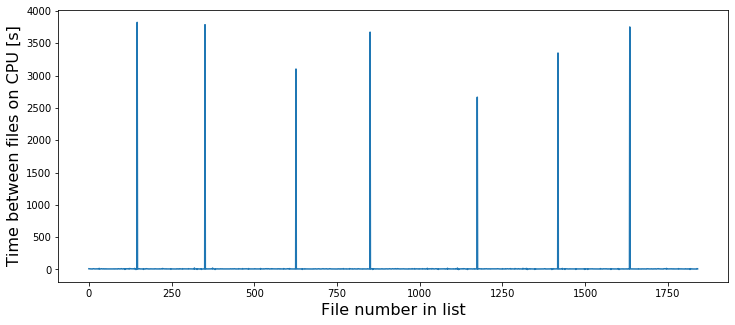

In [5]:
dt = np.array(cpu_dt[1:]) - np.array(cpu_dt[:-1])
dt = np.array([_.seconds for _ in dt])

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.plot(dt)
ax.set_ylabel('Time between files on CPU [s]', fontsize=16)
ax.set_xlabel('File number in list', fontsize=16)

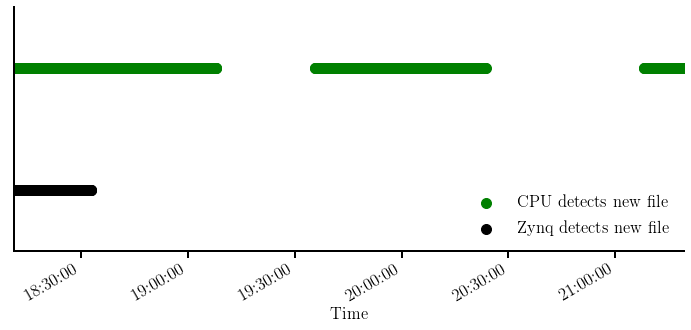

In [277]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 5))
ax.scatter(cpu_dt, np.tile(1.0, len(cpu_dt)), color='g',  
           label='CPU detects new file', s=100)
ax.scatter(zynq_dt, np.tile(0.5, len(zynq_dt)), color='k',
           label='Zynq detects new file', s=100)
ax.set_xlim(min(zynq_dt), max(cpu_dt))
myFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
ax.set_xlabel('Time')
ax.get_yaxis().set_visible(False)
ax.set_ylim(0.25, 1.25)
ax.legend()

In [243]:
print(zynq_dt[-1])
print(cpu_dt[-1])

2019-12-31 05:18:17
2019-12-30 21:19:13.814255


In [248]:
len(zynq_dt)*2

838

In [247]:
len(cpu_dt)

803